In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
file = 'SCOTUS-RULINGS.dta'
df = pd.read_stata(file, convert_categoricals = False)
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,1946-11-18,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,1946-11-18,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3


In [2]:
date_col = 'caseId'
df['year'] = df[date_col].str[:4]
df[[date_col,'year']].head()

,caseId,year
0,1946-001,1946
1,1946-002,1946
2,1946-002,1946
3,1946-002,1946
4,1946-002,1946


In [46]:
df['year'] = pd.to_numeric(df['year'])
after_50_df = df[df['year'] >= 2010]
after_50_before_60_df = after_50_df[after_50_df['year']<2011]
min_year = after_50_before_60_df['year'].min()
max_year = after_50_before_60_df['year'].max()
print(min_year, max_year)

2010 2010


In [47]:
print(list(after_50_before_60_df))
print(len(after_50_before_60_df))
print(len(list(after_50_before_60_df)))

['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision', 'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term', 'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument', 'dateRearg', 'petitioner', 'petitionerState', 'respondent', 'respondentState', 'jurisdiction', 'adminAction', 'adminActionState', 'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource', 'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition', 'lcDispositionDirection', 'declarationUncon', 'caseDisposition', 'caseDispositionUnusual', 'partyWinning', 'precedentAlteration', 'voteUnclear', 'issue', 'issueArea', 'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2', 'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner', 'splitVote', 'majVotes', 'minVotes', 'year']
109
54


In [48]:
col = 'lcDispositionDirection'
col_name = 'lcDispositionDirection'
freq = after_50_before_60_df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

   lcDispositionDirection  freq
1                     1.0    52
0                     2.0    56


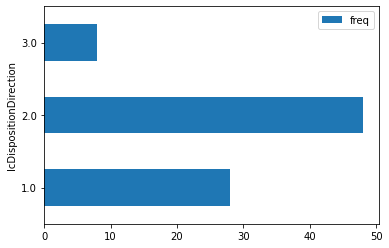

In [17]:
ax = freq.plot.barh(x=col_name, y='freq')

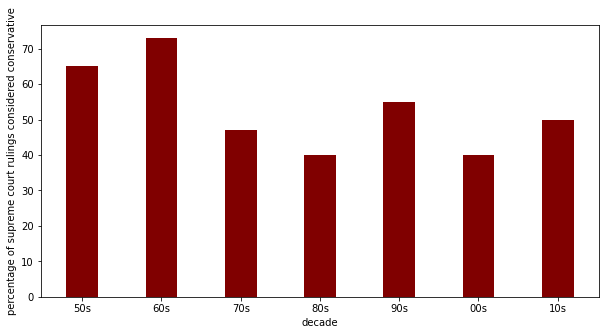

In [50]:
data = {'50s':65, '60s':73, '70s':47, '80s':40, '90s':55, '00s':40, '10s':50}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("decade")
plt.ylabel("percentage of supreme court rulings considered conservative")
plt.show()

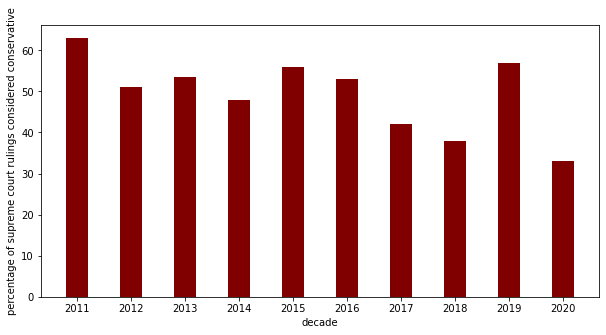

In [55]:
data = {'2011': 63, '2012': 51, '2013': 53.6, '2014': 48, '2015': 56, '2016': 53, '2017': 42, '2018': 38, '2019': 57, '2020': 33}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("decade")
plt.ylabel("percentage of supreme court rulings considered conservative")
plt.show()

   Year  Unemployment Rate
0  2011               63.0
1  2012               51.0
2  2013               53.6
3  2014               48.0
4  2015               56.0
5  2016               53.0
6  2017               42.0
7  2018               38.0
8  2019               57.0
9  2020               33.0


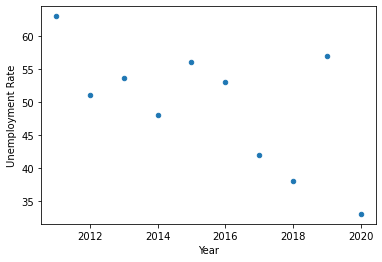

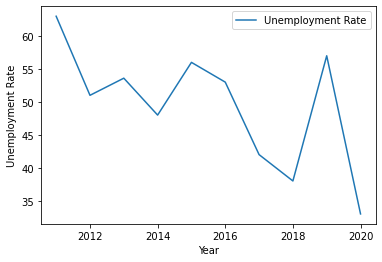

The parameters of the curve: [-1.98181818e+00  4.04381455e+03]


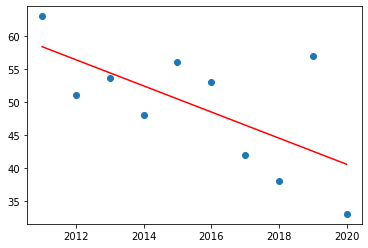

In [93]:
Year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Unemployment_Rate = [63, 51, 53.6, 48, 56, 53, 42, 38, 57, 33]
df = pd.DataFrame(list(zip(Year, Unemployment_Rate)),
               columns =['Year', 'Unemployment Rate'])
print(df)
df.plot(kind='scatter', y='Unemployment Rate', x='Year')
df.plot(kind='line', y='Unemployment Rate', x='Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()
X = df['Year']
y = df['Unemployment Rate']


theta = np.polyfit(X, y, 1)

print(f'The parameters of the curve: {theta}')


y_line=theta[1] + theta[0] * X

plt.scatter(X, y)
plt.plot(X, y_line, 'r')

In [94]:
print ('just changed the dates for the frequency. Manually imported the percentages after I calculated it from the frequency.')

just changed the dates for the frequency. Manually imported the percentages after I calculated it from the frequency.
